### Linear Regression

A linear regression model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term).

Linear Regression model prediction.

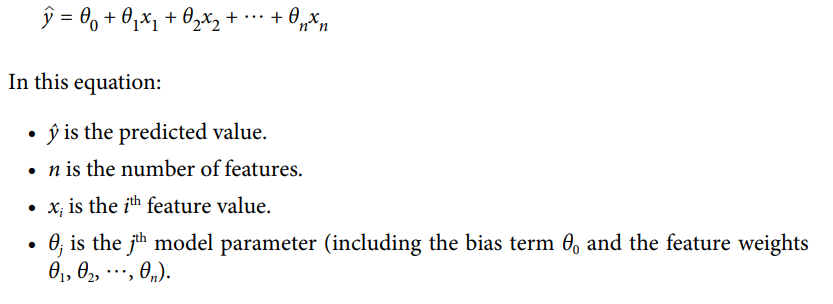

Linear Regression model prediction (vectorized form).

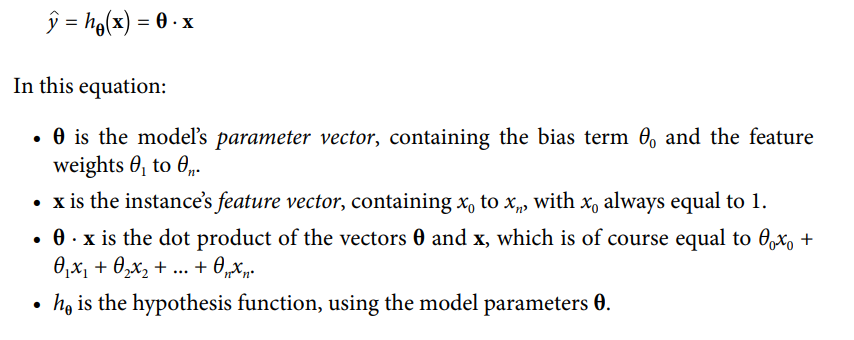

OK, that's the Linear Regression model but how do we train it?

Well, recall that training a model means setting its parameters so that the model best fits the training set.

For this purpose, we first need a measure of how well(or poorly) the model fits the training data.

We know that the most common performance measure of a regression model is the Root Mean Sqyare Error (RMSE).

Therefore, to train a Linear Regression model, we need to find the value of theta that minimizes the RMSE.

Is is simpler to minimize the mean squared error (MSE) that the RMSE, and it leads to the same result (because the value that minimizes a function also minimizes its square root).

MSE cost function for a Linear Regression model

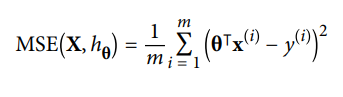

### The Normal Equation

To find the value of theta that minimizes the cost function, there is a closed-form solution in other words, a mathematical equation that gives the result directly. This is called the Normal Equation.

Normal Equation

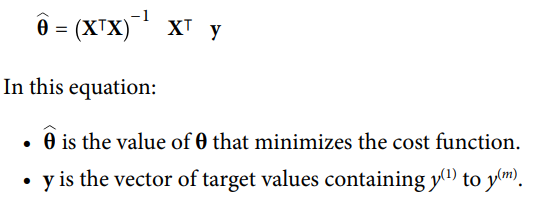

Generating some linear-looking data to test that normal equation

In [1]:
import numpy as np
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

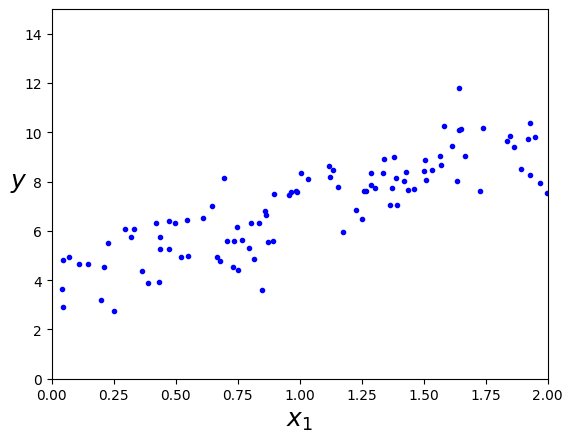

In [2]:
import matplotlib.pyplot as plt
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Now let’s compute θ bar using the Normal Equation. 
We will use the inv() function from NumPy’s linear algebra module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix multiplication.

In [3]:
X_b=np.c_[np.ones((100,1)),X] 
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The function that we used to generate the data is y=4+3x+Gaussian noise.
Let's see what the equation found

In [4]:
theta_best

array([[3.94774144],
       [2.96729177]])

We would have hoped for theta0 = 4 and theta1 = 3 instead of 3.9 and 2.96.
But the noise made it impossible to recover the exact parameters of the original function.

In [5]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[3.94774144],
       [9.88232498]])

ploting model's predictions

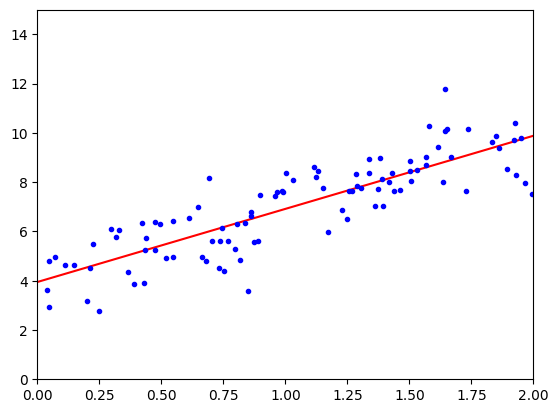

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Performing Linear Regression using Scikit-Learn

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.94774144]), array([[2.96729177]]))

In [8]:
lin_reg.predict(X_new)

array([[3.94774144],
       [9.88232498]])

The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for "least squares"). which you could call directly:

In [9]:
theta_best_svd,residuals,rank,s=np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[3.94774144],
       [2.96729177]])

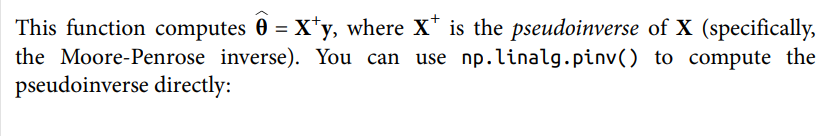

### Note that Scikit-Learn seperates the bias term (intercept_) from the feature weights (coef_).

In [10]:
np.linalg.pinv(X_b).dot(y)

array([[3.94774144],
       [2.96729177]])

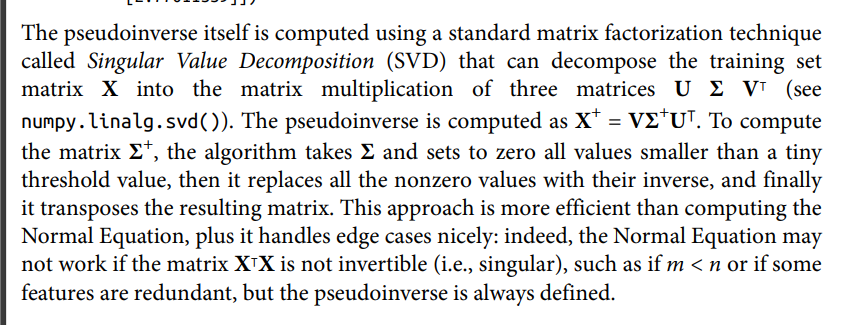

### Gradient Descent

Gradient Descent is a generic optimization algoriithm capable of finding optimal solutions to a wide range of problems.
The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

For ex:- 
Suppose you are lost in the mountains in a dense fog, and you can only feel the slope of the ground below your feet.

A good startegy to get to the bottom of the valley quickly is to go downhill in teh direction of the steepest slope. 

This is exactly what Gradient Descent does: it measures the local gradient of the error funciton with regardd to the parameter vector theta, and it goes in the direction of descending gradient.

Once the gradient is zero, you have reached a minimum!

Concretely, you start by filling theta with random values (this is called random intialization).

Then you improve it gradually, taking one baby step at a time, each step attempting to decreate the cost function, until the algorithm converges to a minimum.

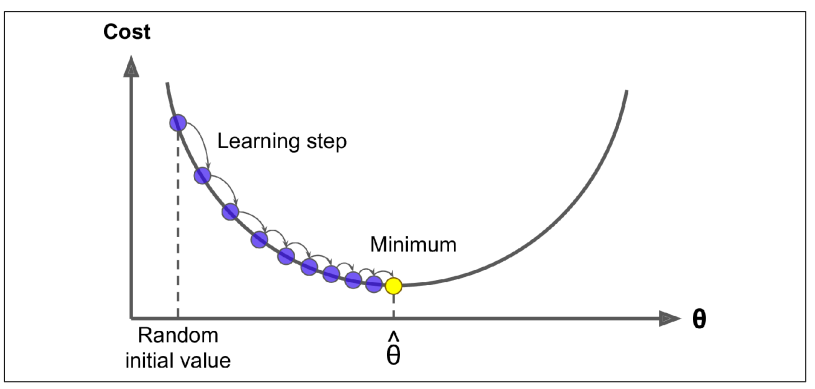

In the above depiction of Gradient Descent, the model parameters are intialized randomly and get tweaked repeatedly to minimize the cost function.
The learning step size is proportional to the slope of the cost function, so the steps gradually get samller as the parameters approach the minimum.

An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hypaerparammeter.

If the learning rate is too small, then the algorithm will have to go through may iterations to converge which will take a long time.

If the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up thatn you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution.

The Learning rate is too small

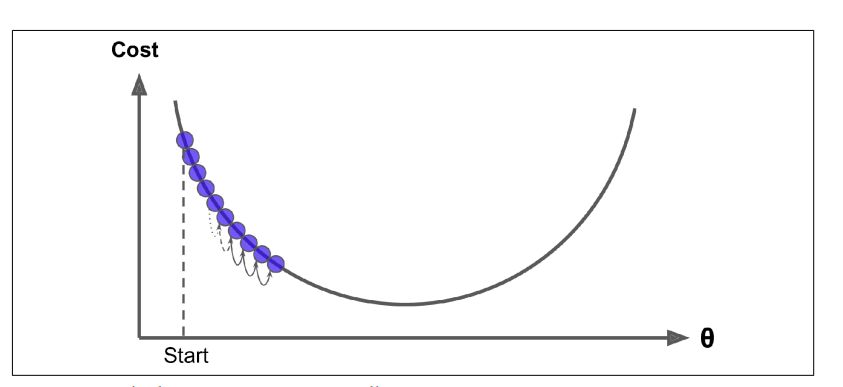

The Learning rate is too large

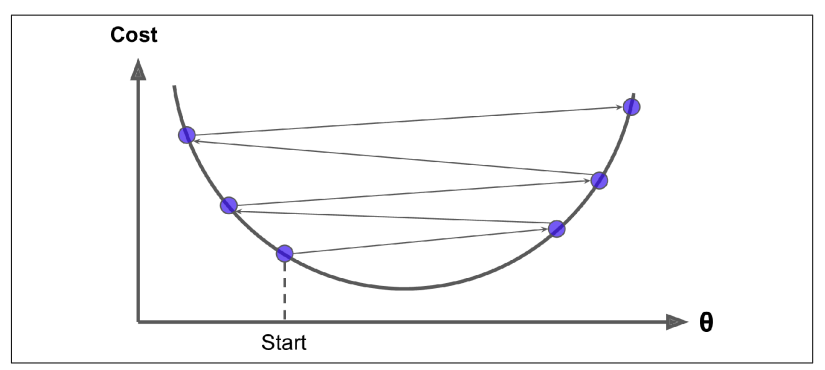

Not all cost functions look like nice, regular bowls.
There may be holes, ridges, plateaus, and all sorts of irregular terrains, making convergence to the minimum difficult. 

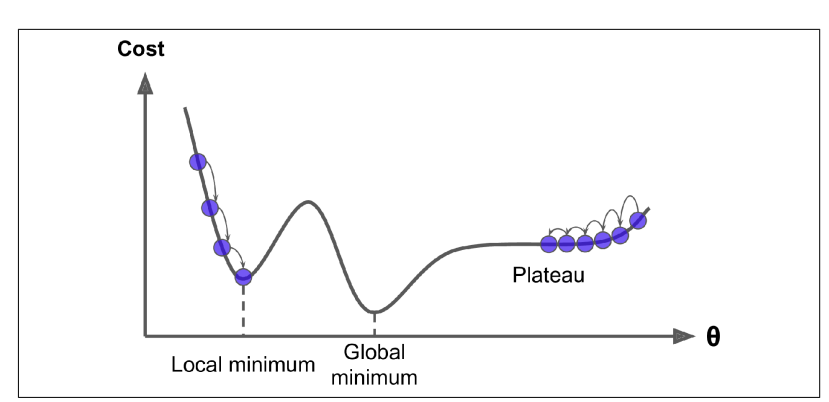

Gradient descent pitfalls:

There are two main challenges with Gradient Descent in the above figure.
1. If the random intialization starts the algorithm on the left, then it will converge to a local minimum, which is not as good as the global minimum.

2.If it starts on the right, then it will take a very long time to cross the plateau. And if you stop too early, you will never reach the global minimum.

Fortunately, the MSE cost function for a Linear Regression model happes to be a convex funciton, whcih means that if you pick any two points on the curve, the line segment joining them never crosses the curve. 

This implies that there are no local minima, just one global minimum.

It is also a continuous function with a slope that never changes abruptly. These two facts have a grate consequence: Gradient Descent is guarenteed to approach arbitarily close the global minimum (if you wait long enough and if the learning rate is not too high).

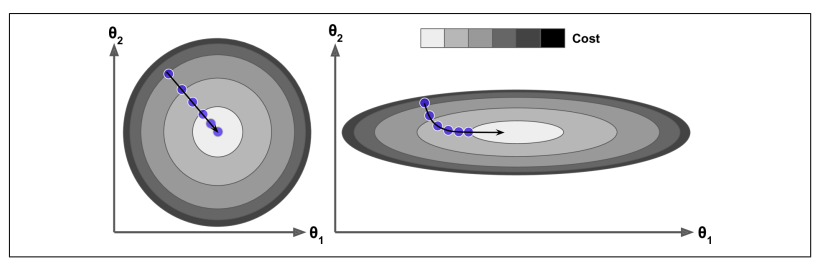

Gradient Descent with (left) and without (right) feature scaling

As we can see, on the left the Gradient Descent algorithm goes straight toward the minimum, thereby reaching it quickly.
Whereas on the right it first goes in a direction almost orthogonal to the direction of the global minimum, and it ends with a long march down an almost flat valley. It will eventually reach the minimum, but it will take a long time.

Note:- When using Gradient Descent, you should ensure that all features have a similar scale (e.g using Scikit-learn's StandardScaler class), or else it will take much longer to converge.

### Batch Gradient Descent

To implement Gradient Descent, you need to compute thte gradient of the cost function with regard to each model parameter theta j.

In other words, you nee to calculate how much the cost function will change if you change theta j just a little bit.This is called a partial derivative.

It is like asking "what is the slope of the mountain under my feet if I face east?" and then asking the same question facing north.

Partial derivaitve of the cost function

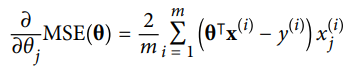

Gradient vector of the cost function

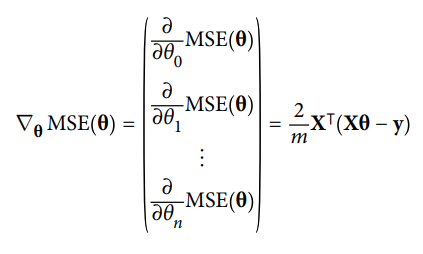

Notice that this formula involves calculations over the full training set X, at each Gradient Descent step! This is why the algorithm is called Batch Gradient Descent: it uses the whole batch of training data at every step (actually, Full Gradient Descent would probably be a better name).

As a result it is teriibly slow on very large training sets. However, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation or SVD decomposition.

Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill. 

This means subtracting gradient vector from theta.

This is where the learning rate eta comes into play. Multiply the gradient vector by eta to determine the size of the downhill step.

Gradient Desccecnt step

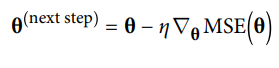

Let's look at a quick implementation of his algorithm:

In [11]:
eta=0.1
n_iterations=1000
m=100

In [12]:
theta=np.random.randn(2,1)

In [13]:
for iteration in range(n_iterations):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradients
theta

array([[3.94774144],
       [2.96729177]])

That's exactly what the Normal Equation found! Gradient Descent worked perfectly.

But what if you had used a different learning rate eta?

Shows the first 10 steps of Gradient Descent using three different learning rates (the dashed line represents the starting point).

Gradient Descent with various learning rates

In [14]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

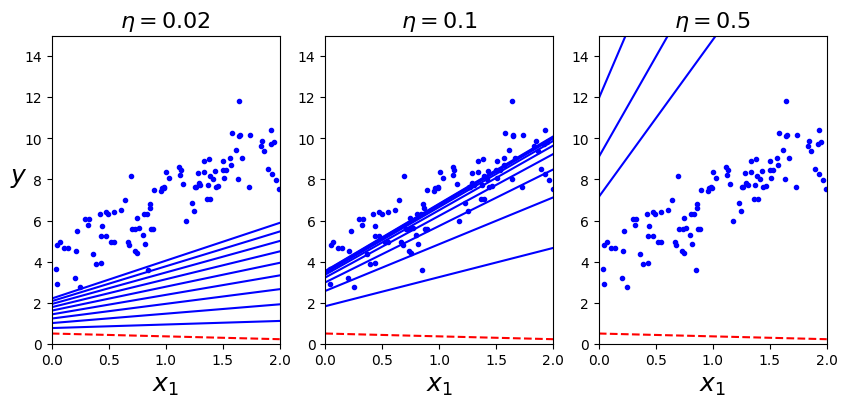

In [15]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

On the left, the leraning rate is too low: the algorithm will eventually reach the solution, but it will take a long time.

In the middle, the learning rate looks pretty good: in just a few iterations, it has already converged to the solution. 

On the right, the leraning rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step.

To find a good learning rate, we can use grid search. however, you may want to limit the number of iterations so that grid search can eliminate models that take too long to converge.

You may wonder how to set the number of iterations. 

If its too low, you will still be far away from the optimal solution when the algo stops

If its too hight you will waste time while the model parameters do not change anymore.

A simple solution is to set a very large number of iterations but to interrupt the algorithmm when the gradient vector becomes tiny that is, when its norm becomes smaller than a tiny number e (called the tolerance) because this happens when Gradient Descent has (almost) reached the minimum.

### Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it uses the whole set to compute the gradients at every step, which makes it very slow when the training set is large.

Stochastic Gradient Descent picks a random instance in the training set at every step and computes the gradients based only on that single instance.

Obviously, working on a single instance at a time makes the algorithm much faster because it has very little data to manipulate at every iteration.

It also makes it possible to train on huge training sets, sincec only one instance needs to be in memory at each iteration

On the other hand, due to its stochastic nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. 

Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down.

So once the algorithm stops, the final parameter values are good, but not optimal.

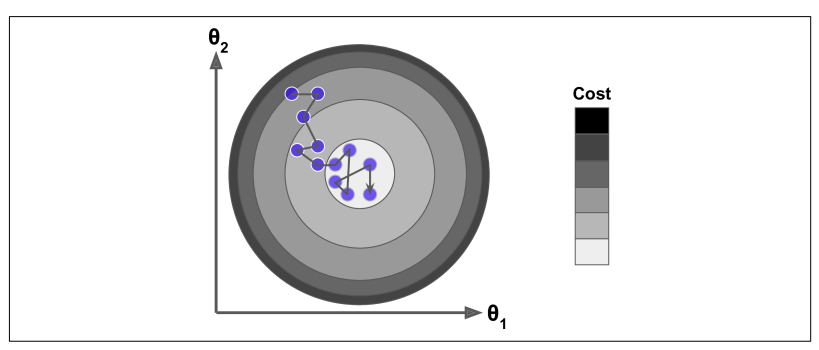

With Stochastic Gradient Descent, each trianing step is much faster but also much more stochastic than when using Batch Gradient Descent

When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.

Therefore, randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum.

One solution to this dilemma is to gradually reduce the learning rate.

The steps start out large(which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum.

The function that determines thee learning rate at each iteration is called the learning schedule. It the leraning rate is reduced too quicl;y, you may get stuck in a local minimum, or even end up frozen halfway to the minimum.

If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early

In [16]:
n_epochs=50
t0,t1=5,50 #learning schedule hyperparameters
def learning_schedule(t):
    return t0/ (t+t1)

theta=np.random.randn(2,1) #random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[3.90300134],
       [2.99886559]])

By convention we iterate by rounds of m iterations; each round is called an epoch.

While the Batch Gradient Descent code iterated 1k times through the whole training set, this code goes through the training set only 50 times and reaches a pretty good solution

In [17]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

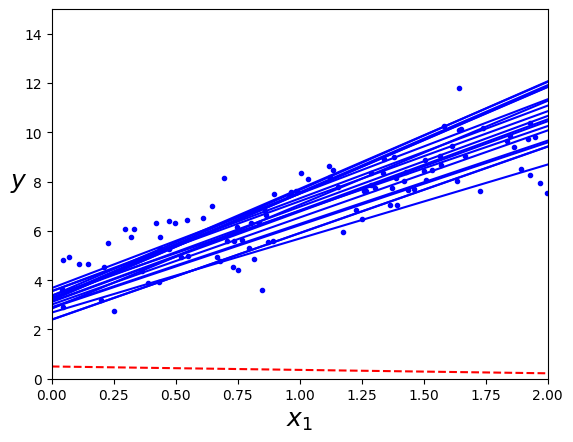

In [18]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) 

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:   
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)         

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)             
plt.ylabel("$y$", rotation=0, fontsize=18)   
plt.axis([0, 2, 0, 15])                      
plt.show()                   

When using Stochastic Gradient Descent, the training instances must be independent and identically distributed (IID) to ensure that the parameters get pulled toward the global optimum, on average.

To perform Linear Regression using Stochastic GD with Scikit-learn, we use th SGDRegressor class, which defaults to optimizing the squared error cost function.

In [19]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [20]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.02161195]), array([3.05185915]))

The following code runs for maximum 1000 epochs or until the loss drops by less than 0.001 during one epoch.(max_iter=1000,tol=1e-3).

It starts with a learning rate of 0.1 (eta0=0.1).

### Mini-batch Gradient Descent

Instead of computing the gradients based on the full training set or based on just one instance, Mini-batch GD computes the gradients on small random sets of instances called mini-batches.

The main advantage of Mini-batch GD over Stochastic GD is that you can get a perormance boost from hardware optimization of matrix operations, especially when using GPUs.

The algorithm's progress in parameter space is less erratic tthan with Stochastic GD, especially with fairly large mini-batches.

In [21]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [22]:
theta

array([[3.93267214],
       [2.93787502]])

In [23]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

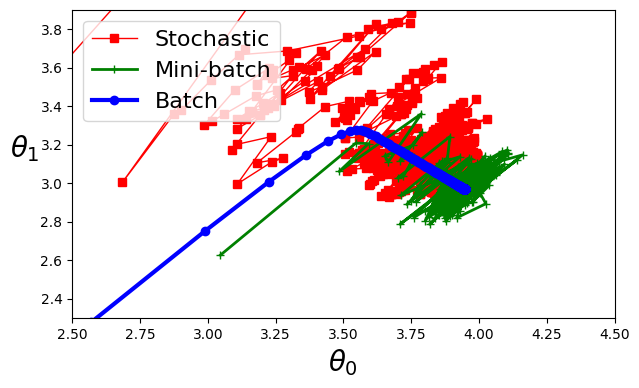

In [24]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

The above figure shows the paths taken by the three Gradient Descent algorithms in parameter space during training.

They all end up near the minimum, but Batch GD's path actually stops at the minimum, while both Stochastic GD and Mini-batch GD continue to walk around. 

However, don't forget that Batch GD takes a lot of time to take each step, and Stochastic GD and Mini-batch GD would also reach the minimum if you used a good learning schedule.

Comparison of algorithms for Linear Regression

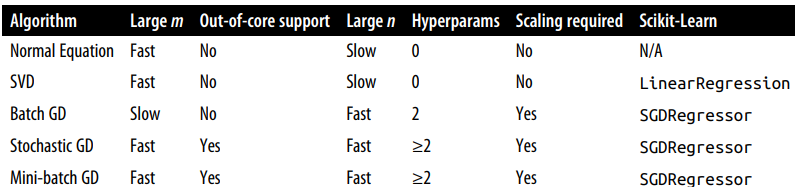

There is almost no difference after training: all these algorithms end up with very similar models and make predictions in exactly the same way.

### Polynomial Regression

What if your data is more complex than a straight line?

Suprisingly, we can use a linear model to fit nolinear data.

A simple way to do this is to add powers of each feature as ne features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

Let's generate some nonlinear data, based on a simple quadratic equation plus some noise.

In [25]:
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

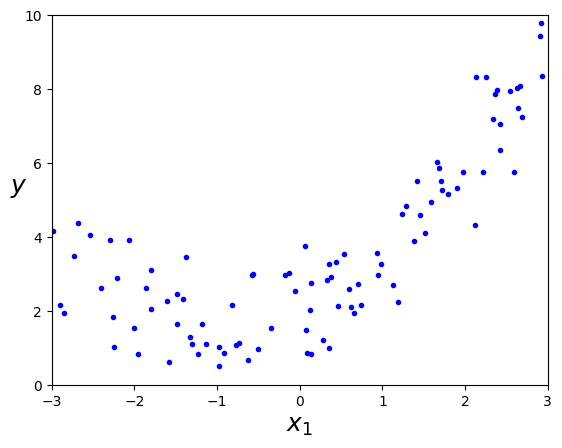

In [26]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In the above figure we can see Generated non linear and noisy dataset.

Clearly, a straight line will never fit this data properly. So let's use Scikit-Learn's PollynomialFeatures class to transform our training data, adding the square (second degree polynomial) of each feature in the training set as a new feature (in this case there is just one feature):

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]

array([2.38942838])

In [28]:
X_poly[0]

array([2.38942838, 5.709368  ])

X_poly now contains the original feature of X plus the sqaure of this feature. Now we can fit a LinearRegression model to this extended training data.

In [29]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

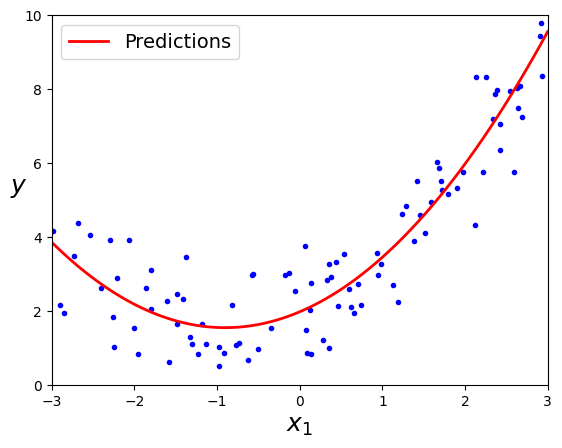

In [30]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

Not bad the models estimates 0.52x1^2 + 0.95x1 +1.97 when in fact the original function was y=0.5x1^2 + 1.0x1 +2+Gaussian noise

Note that when are multiple features, Polynomial Regression is capable of finding relationships betweenf eatures (which is something a plain Linear Regression model cannot do).

This is made possible by the fact that PolynomialFeatures also adds all combinations of features up to the given degree.

For example, if there were two features a and b, PolynomialFeatures with degree=3 would not only add the features but also the cominations

PolynomialFeatures(degree=d) transforms an array containing n features into an array containing (n+d)! /d!n! features, where n! is the factorial of n, equal to 1X2X3...n. Beware of the combinatorial explosion of the number of features!

### Learning Curves

If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with the plain Linear Regression.

For example, the figure below applies a 300-degree polynomial model to the preceding training data, and compares the result with a pure linear model and a quadratic model (second-degree polynomial).

Notice how the 300-degree polynomial model wiggles around to get as close as possible to the training instances.

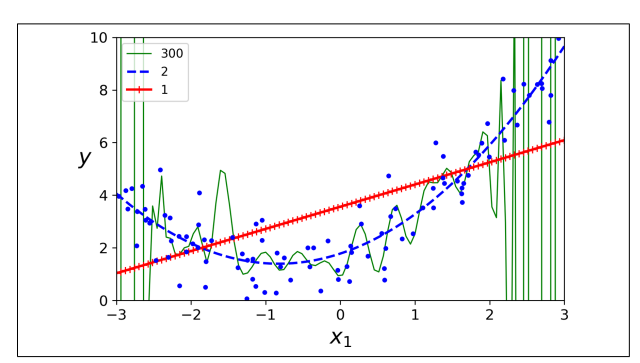

High-degree Polynomial Regression

The high-degree Polynomial Regression model is severyl overfitting the training data, while the linear model is underfitting it.

The model that will generalize best in this case is the quardractic model, which makes sense because the data was genrated using a quadratic model.

But in genral you won't know what function generated the data, so how can we decide how complex our model should be?

How can you tell that your model is overfitting or underfitting the data?

### IMPORTANT

We use cross-validation to get an estimate of a model's generalization performance. 

If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting. This is one way to tell when a model is too siple or too complex.

Another way to tell is to look at the learning curves: these are plots of model's performance on the trianing set and the validation set as a function of the training set size (or the training iteration).

To generate the plots, train the model several times on different sized subsets of the training set. 

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [32]:
def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
    train_errors,val_errors=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)  

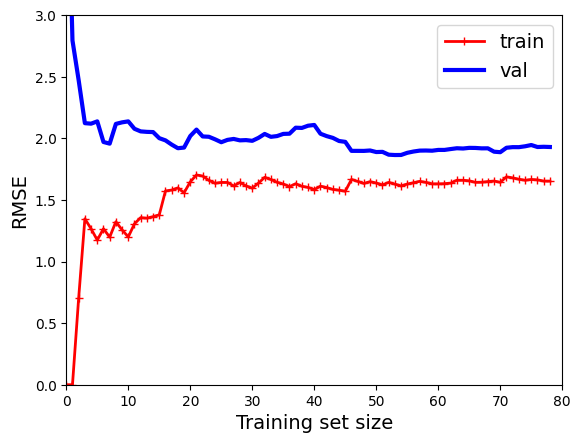

In [33]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         
plt.show()  

First, let's look at performance on th training data: when there are just one or two instances in the trainings set, the model can fit them perfectly, which is why the curve starts at 0.

But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all.

So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn't make the average error much better or worse.

Now let's look at the performance of the model on the validation data. 

When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initally quite big.

Then, as the model is shown more training examples, it learns, and thus the validation error slowly goes down. 

However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.

These learning curves are typical of a model that's underfitting.

Both curves have reached a plateau; they are close and fairly high.

### NOTE:

If your model is underfitting the training data, adding more training examples will not help. You need to use a more complex model or come up with better features.

Now let's look at the learning curves of a 10th-degree polynomial model on the same data

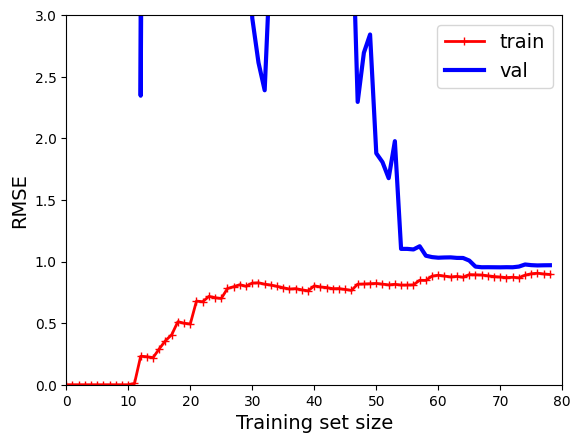

In [34]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.show() 

These learning curves look a bit like the previous ones, but there are two very important differences:

The error on the training data is much lower than with Linear Regression model.

There is a gap between the curves. This means that the model performs signifficantly better on the training data than on the validation data, which is the hallmark of an overfitting model. If you used a much larger training set, however, the two curves would continue to get closer.

One way to improve an overfitting model is to geed it more training data until the validation error reaches the training error.

### The Bias/Variance Trade-off

Bias:

This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratric. A high-bias model is most likely to underfit the training data.

Variance:

This part is due to the model's excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such a high-degree-polynomial model) is likely to have high variance and thus overfit the training data.

Irreducible error:

This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (Ex:- fix the data sources, such as broken sensors, or detect and remove outliers).

Increasing a model's complexity will typically increase its variance and reduce its bias. Conversely, reducing a model's complexity increases its bias and reduces its variance. This is why it is called a trade-off.

### Regularized Linear Models

A good way to reduce overfitting is to regularize the model (i.e. to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit tthe data.

A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

For a linear model, regularization is typically achieved by constraining the weights of the model.

We will now look at Ridge regression, Lasso regression, and elastic net which implement 3 different ways to constrain the weights.

### Ridge Regression

Ridge regression (also called Tikhonov regularization) is a regularized verson of Linear Regression. 

A regularization term 
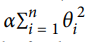 
is added to the cost function.

The hyperparameter alpha controls how much you want to regularize the model.

If alpha is equal to 0 then Ridge Regression is just Linear Regression.

If alpha is very large, then all weights end up very close to zero and the result is a flat line going through the data's mean.

Ridge Regression cost function.

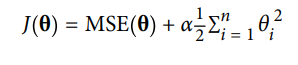

### Note:-

It is important to scale the data before performin Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.

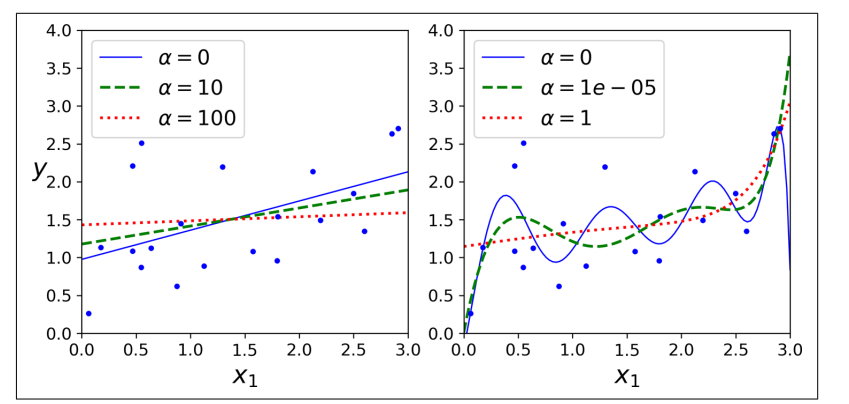

A linear model (left) and a polynomial model(right), both with various levels of Ridge regularization.

The above figure shows several Ridge models trained on some linear data using different alpha values.

On the left, plain Ridge models are used, leading to linear predictions.

On the right, the data is first expanded using PolynomialFeatures(degree=10), then it is scaled using a StandardScaler, and finallyy the Ridge models are applied to the resulting feautres: this is Polynomial Regression with Ridge regularization.

### Note:
How increasing alpha leads to flatter (i.e., less extreme, more reasonable) predictions, thus reducing the model's variance but increasing its bias.

As with Linear Regression, we can perform Ridge Regression either by computing a closed-form equation or by performing Gradient Descent. The pros and cons are the same

Ridge Regression closed-form solution

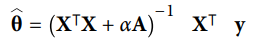

where A is the (n+1)X(n+1) identity matrix except with a 0 in the top-left cell corresponding to the bias term.

Here is how to perform Ridge Regression with Scikit-learn using a closed-form solution.

In [35]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [36]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

And using Stochastic Gradient Descent.

In [37]:
sgd_reg=SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])


array([1.46619232])

The penalty hyperparameter sets the type of regularization term to use.

Specifying "l2" indicates that you want SGD to add a regularization term to the cost function equal to half the square of the l2 norm of the weight vector: this is simply Ridge Regression.

### Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the l1 norm of the weight vector instead of half the square of the l2 norm.

Lasso Regression cost function


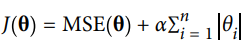

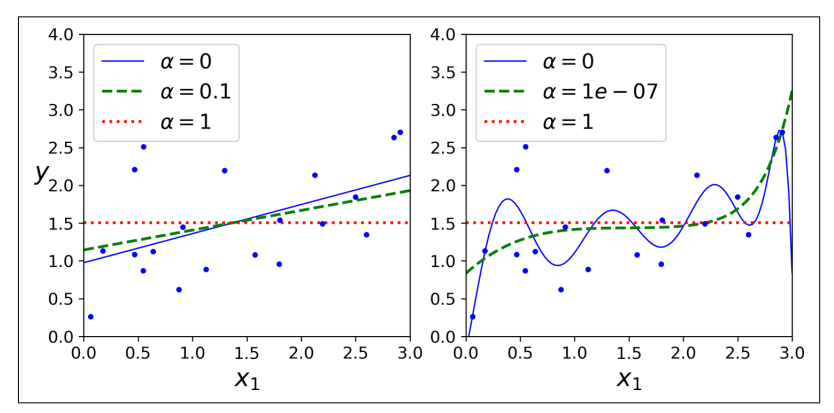

A linear model(left) and a polynomial model (right), both using various levels of Lasso regularization.

An important characteristic of Lasso Regression is that it tends to eliminate the weights of the least important features (i.e. set them to zero).

For E.x. the dashed line in the righthand plot with (alpha=10^-7) looks quadraticc, alomst linear: all the weights for the high-degree polynomial features are equal to zero.

In other words, Lasso Regression automatically performs feature selection and outputs a sparse model(e.e with few nonzero feature weights).

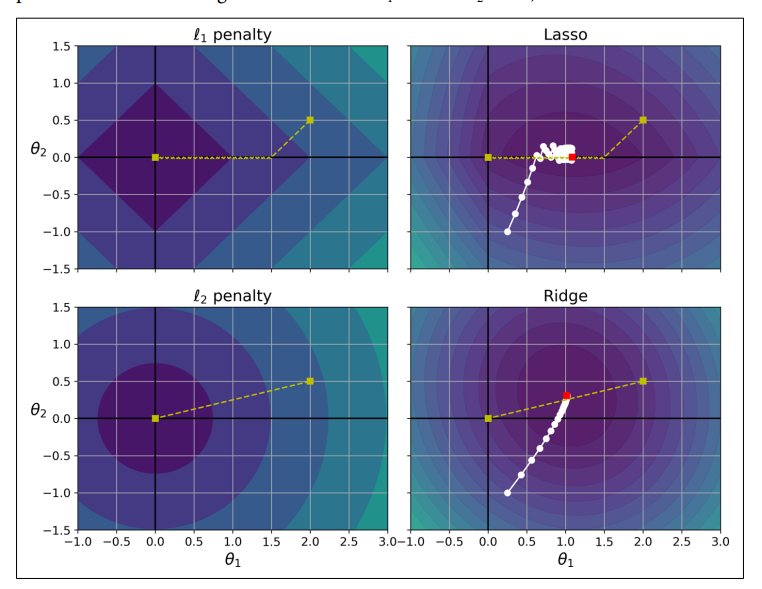

Lasso versus Ridge regularization

In the top-left plot, the contours represent the l1 loss (|theta1|+|theta2|) which drops linearly as you get closer to any axis.

For ex if you intialize the model parameters to theta1=2 and theta2=00.5, running Gradient Descent will decrement both parameters equally: therefore theta2 will reach 0 first since it was closer to 0 to begint with.

After that, Gradient Descent will roll down the gutter until it reaches theta1=0 (with a bit of bouncing around, since the gradients of l1 never get close to 0: they are either -1 or 1 for each parameter).

In the top-right plot, the contours represent Lasso's cost function (an MSE cost function plus an l1 loss ). 

The white circcles show the path that Gradient Descent takes to optimize some model parameters that were intialized around theta1=0.25 and theta2=-1" notice once again how the path quickly reachers theta2=0, then rolls down the gutter and ends up bouncing around the global optimum (represented by the red square).

If we increased alpha, the global optimum would move left along the dashed yellow line, while if we decreased alppha the global optimum would move right (in this example, the optimal parameters for the unregularized MSE are theta1=2 and theta2=0.5).

The two bottom plots show the same thing but with an l2 penalty instead. In the bottom-left plot, you can see that the l2 loss decreases with the distance to the origin, so Gradient Descent just takes a straight path toward that point.

In the bottom-right  plot, the contours represent Ridge Regression's cost function (i.e an MSE cost function plus an l2 loss). 

There are two main differences with Lasso. First, the gradients get smaller as the parameters approach the global optimum, so Gradient Descent naturally slows down, which helps convergence (as there is no bouncing around).

Scond, the optimal parameters (represented by the red quare) get closer and closer to the origin when you increase alpha, but they never get eliminated entirely.

To avoid Gradient Descent from bouncing around the optimum at the end when using Lasso, you need to gradually reduce the learning rate during training (it will still bounce around the optimum, but the steps will get smaller and smaller, so it will converge).

The Lasso cost function is not differntiable at theta1=0 (for i=1,2,3...n), but Gradient Descent still works fine if you use a subgradient vector instead when any theta1=0.

Lasso Regression subgradient vector
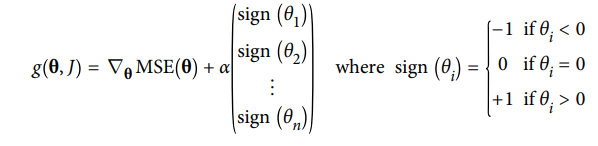

Lasso regression using Scikit-Learn

In [38]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

### Note:
we could instead use SGDRegressor(penalty="l1").

### Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a imple mix of both Ridge and Lasso's regularization terms, and you can control the mix ratio r. When r=0, Elastic net is equivalent to Ridge Regression, and when r=1, it is equaivalent to Lasso Regression.

Elastic Net cost function

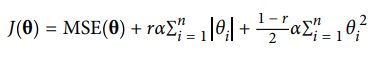

So wehn should we use plain Linear Regression (i.e. without any regularization), Ridge, Lasso, or Elastic net?

It is almost always prefereable to have at least a bit of regularization, so generally you shold avoid plain Linear Regression.

Ridge is a good default, but if you suspect that only a few features are useful, you should prefer Lasso or Elastic net because they tend to reduce the useless features weights down to zero as we have discussed.

In general, Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

In [39]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

### Early Stopping

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping.

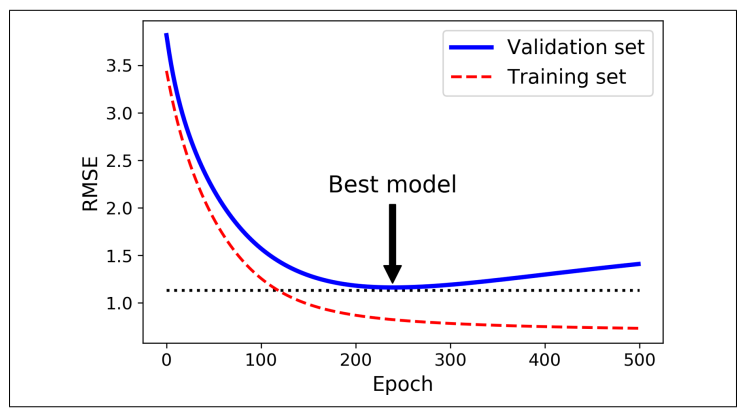

The above figure shows a complex model(in this case, a high-degree Polynomial Regression model) being trained with Batch Gradient Descent. As the epochs go by the algoritthm learns, and its prediction error(RMSE) on the training set goes down, along with its prediction error on the validation set.

After a while though the validation error stops decreasing and starts to go back up. This indicates that the model has started to overfit the training data. With early stopping you just stop training as soon as the validation error reaches the minimum. 

With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not.

One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better), then roll back the model parameters to the point where the validation error was at a minimum.